In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
size=np.load("../data/generate_data/size")

In [24]:
size

array([452, 451, 473, ...,  10,  13,  11])

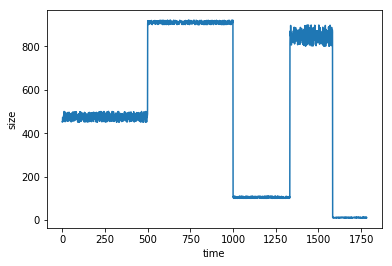

In [25]:
plt.plot(range(len(size)),size)
plt.ylabel("size")
plt.xlabel("time")
plt.savefig("../img/size_tendency")

In [26]:
from keras.layers.core import Dense,Activation
from keras.layers.recurrent import SimpleRNN,LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
from keras.utils import plot_model
from keras.models import load_model

In [27]:
size=size.reshape(-1,1)
size

array([[452],
       [451],
       [473],
       ...,
       [ 10],
       [ 13],
       [ 11]])

In [28]:
#scaler=MinMaxScaler(feature_range=(0,1),copy=False)
#size=scaler.fit_transform(size)
size=np.divide(size,1024)
size.shape
size[1:3].T
#size[3]

array([[0.44042969, 0.46191406]])

In [29]:
NUM_TIMESTEPS=10
HIDDEN_SIZE=32
BATCH_SIZE=32

X=np.zeros((size.shape[0],NUM_TIMESTEPS))
Y=np.zeros((size.shape[0],1))

for i in range(len(size)-NUM_TIMESTEPS):
    X[i]=size[i:i+NUM_TIMESTEPS].T
    Y[i]=size[i+NUM_TIMESTEPS]-size[i+NUM_TIMESTEPS-1]
X=np.expand_dims(X,axis=2)

In [30]:
sp=int(0.85*len(size))
Xtrain,Xtest,Ytrain,Ytest=X[0:sp],X[sp:],Y[0:sp],Y[sp:]
Xtrain.shape

(1515, 10, 1)

In [31]:
NUM_EPOCHS=5
model=Sequential()
model.add(SimpleRNN(HIDDEN_SIZE,input_shape=(NUM_TIMESTEPS,1),return_sequences=False))
model.add(Dense(1))
#model.add(Activation("softmax"))

model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mean_squared_error"])

history=model.fit(Xtrain,Ytrain,epochs=NUM_EPOCHS,batch_size=BATCH_SIZE,validation_data=(Xtest,Ytest))

Train on 1515 samples, validate on 268 samples
Epoch 1/5
1515/1515 [==============================] - 1s 418us/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 2/5
1515/1515 [==============================] - 0s 138us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 3/5
1515/1515 [==============================] - 0s 143us/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 4/5
1515/1515 [==============================] - 0s 144us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/5
1515/1515 [==============================] - 0s 151us/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


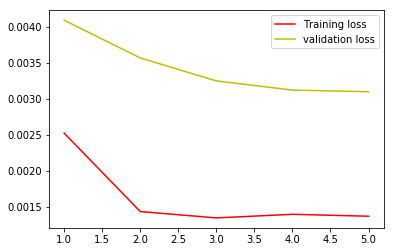

In [49]:
mean=history.history['mean_squared_error']
val_mean=history.history['val_mean_squared_error']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(mean)+1)

#plt.plot(epochs,mean,'b',label="Training mean")
#plt.plot(epochs,val_mean,'g',label="Validation mean")
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'y',label="validation loss")

plt.legend()
#plt.figure()
plt.savefig("../img/size_SimpleRNN.png")
#plt.show()

In [33]:
model.save("../model/size_SimpleRNN.h5")
model_r=load_model("../model/size_SimpleRNN.h5")

In [34]:
a=[30]*10
b=np.array(a)
#b=scaler.fit_transform(b)
b=b.reshape(1,10,1)
b=np.divide(b,1024)
#b=scaler.fit_transform(b)
pred=model.predict(b)[0,0]+b[0,9]

In [35]:
pred*1024

array([29.85062402])

In [36]:
import predict
import imp
imp.reload(predict)

<module 'predict' from '/home/drdh/lx/X-dll/LSTM/model/model_src/predict.py'>

In [48]:
predict.network([10,11,12,3],36,1,[1,4],500,1,4,[18,6,2,17],[18,6,2,7],[18,6,2,7],1)

([0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
 1,
 1,
 [0, 0, 1, 0, 0],
 0,
 1,
 4,
 [0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 1)

In [3]:
int(np.floor(9.9))

9

In [4]:
int(9.9)

9